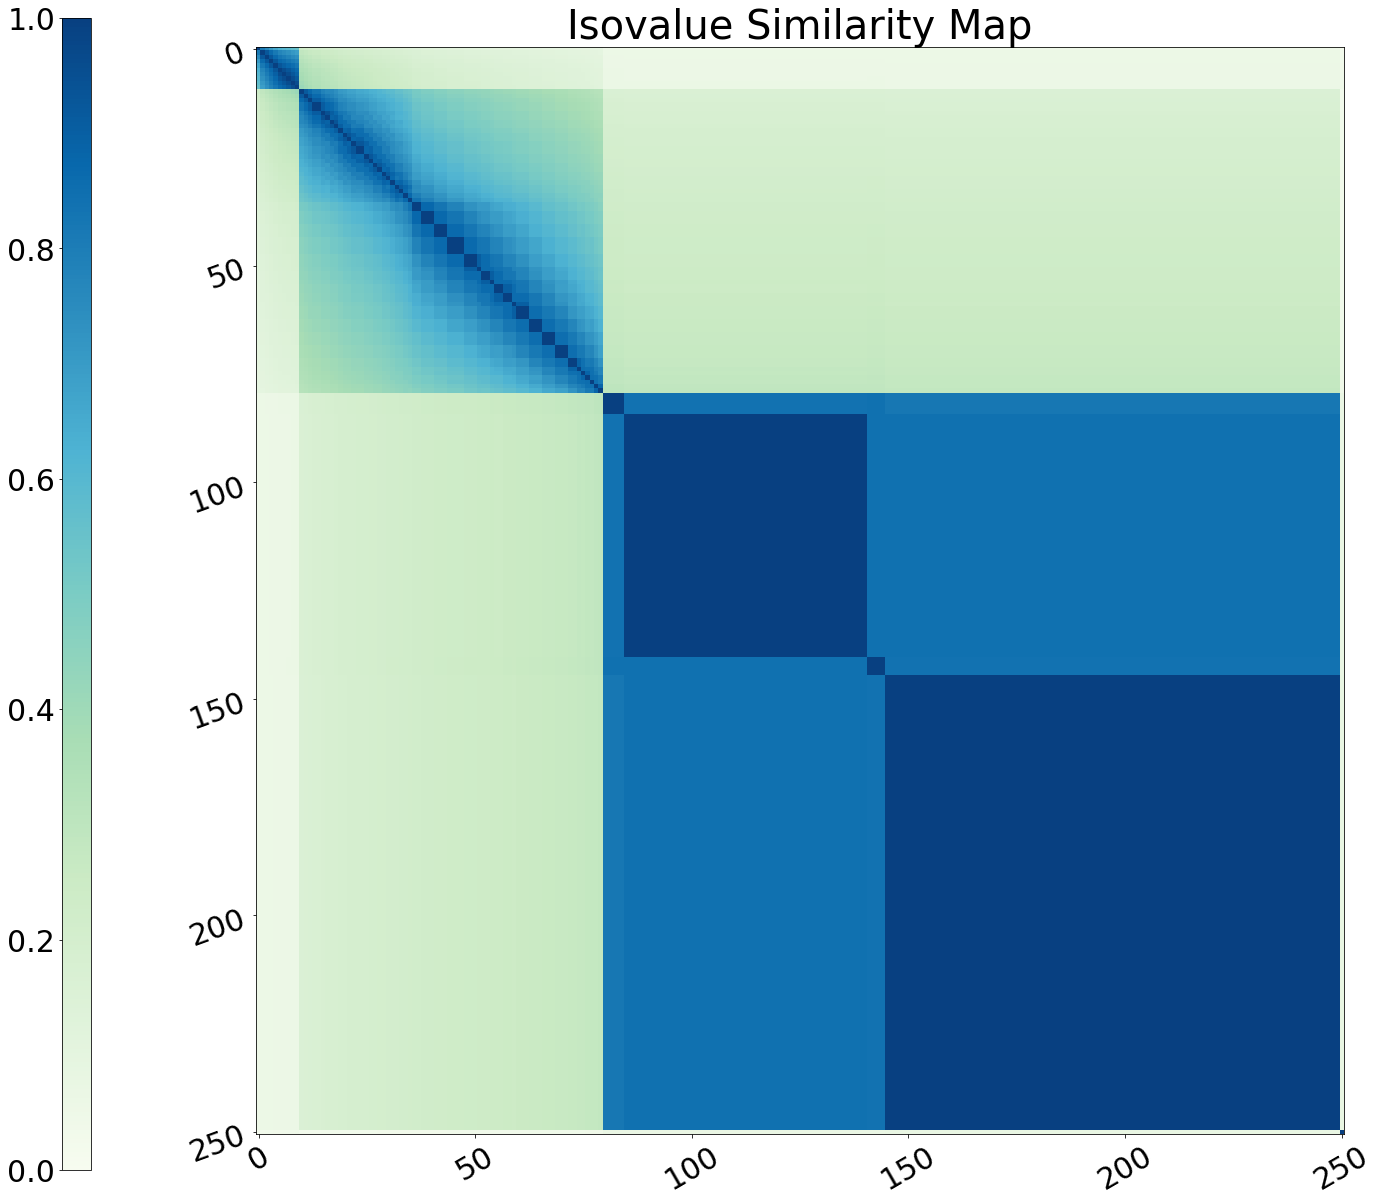

In [5]:
from sklearn.preprocessing import minmax_scale
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), "../.."))
csv_filename = BASE_DIR + '\StreamingAssets\SimilarityMapCSV\hydrogen.raw_similarityMap.csv'
df = pd.read_csv(csv_filename, index_col = 0).replace(np.nan, 0)
npArr = df.to_numpy()
npArr = np.rot90(npArr, -1)
fig, ax = plt.subplots(figsize=(20,20))
plt.xticks(fontsize=30, rotation = 30)
plt.yticks(fontsize=30, rotation = 20)
ax.set_title('Isovalue Similarity Map', fontsize=40) # 

coll=ax.imshow(npArr, vmin=0, vmax=1, cmap='GnBu') #, 
cbaxes = fig.add_axes([0.0, 0.1, 0.02, 0.8])  # This is the position for the colorbar
cbar = fig.colorbar(coll, cax = cbaxes) #  orientation='horizontal'
cbar.ax.yaxis.set_ticks_position('left')
coll.figure.axes[1].tick_params(axis="x", labelsize=40)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(30)
        

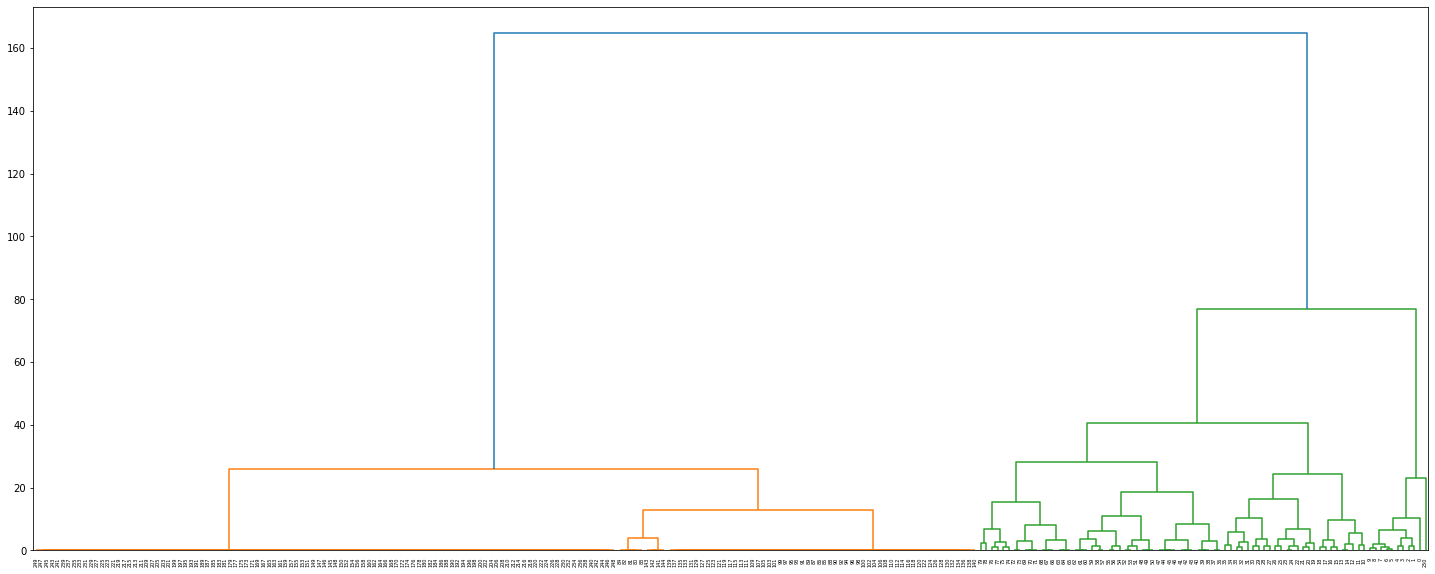

In [6]:
import scipy.cluster.hierarchy as shc
from collections import defaultdict, OrderedDict
fig, ax = plt.subplots(figsize=(25, 10))
dis = shc.linkage(npArr,metric='cityblock', method='complete',  optimal_ordering = True ) # metric='cityblock', method='complete',
dend = shc.dendrogram(dis, ax = ax)
fig.canvas.draw()

In [31]:
k = 8
cluster = shc.fcluster(dis, k, criterion='maxclust')
ci = cluster
print(ci)
(unique, ix) = np.unique(ci, return_index=True )
frequencies_ix = np.asarray((unique, ix)).T
a1 = [ci[i] for i in sorted(np.unique(ci, return_index=True)[1])]
print(a1)
(unique, counts) = np.unique(ci, return_counts=True )
frequencies_Counts = np.asarray((unique, counts)).T
a2 = frequencies_Counts[:,1]
print(a2)

a3 = np.stack([a1,a2])
#plt.scatter(npArr[:,0], npArr[:,1], c = cluster)

[7 7 7 7 7 7 7 7 7 7 6 6 6 6 6 6 6 6 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 8]
[7, 6, 5, 4, 3, 2, 1, 8]
[105  65  17  27  17   9  10   1]


In [32]:
data_df = pd.DataFrame(a3).T
data_df

,0,1
0,7,105
1,6,65
2,5,17
3,4,27
4,3,17
5,2,9
6,1,10
7,8,1


In [33]:
final_df = data_df.sort_values(by=[0], ascending=True)
final_df[1]

6     10
5      9
4     17
3     27
2     17
1     65
0    105
7      1
Name: 1, dtype: int64

In [34]:
final_df[1].to_csv("hydrogen_isoRange_8.txt", sep='\t', header=False, index=False)

[7 6 5 4 3 2 1 8]
[7, 6, 5, 4, 3, 2, 1, 8]
[105  65  17  27  17   9  10   1]


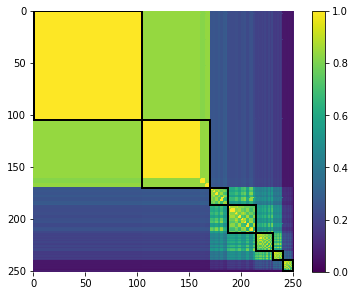

In [35]:
# Visulization Cluster

from netneurotools import plotting

d = plotting.plot_mod_heatmap(npArr, cluster , vmin=0, vmax=1, cmap='viridis') #communities=cluster, inds= cluster
ci = cluster

print(ci[np.concatenate(([True], np.diff(ci) != 0))])

a1 = [ci[i] for i in sorted(np.unique(ci, return_index=True)[1])]
print(a1)
(unique, counts) = np.unique(ci, return_counts=True )
frequencies_Counts = np.asarray((unique, counts)).T
a2 = frequencies_Counts[:,1]
print(a2)

a3 = np.stack([a1,a2])
